In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
exchange_rates = pd.read_parquet('/content/drive/MyDrive/ML/historical_currency_exchange.parquet')
transactions = pd.read_parquet('/content/drive/MyDrive/ML/transaction_fraud_data.parquet')

In [ ]:
list(transactions.columns)

In [ ]:
transactions.head()

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,False,False,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,True,True,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,False,False,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,False,False,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,True,False,False,"{'num_transactions': 218, 'total_amount': 4827...",True


In [ ]:
exchange_rates.head()

,date,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD,USD
0,2024-09-30,1.443654,5.434649,1.351196,0.895591,0.747153,142.573268,19.694724,1668.736400,94.133735,1.280156,1
1,2024-10-01,1.442917,5.444170,1.352168,0.897557,0.746956,143.831429,19.667561,1670.694524,92.898519,1.284352,1
2,2024-10-02,1.449505,5.425444,1.348063,0.903056,0.752241,143.806861,19.606748,1669.653006,94.583198,1.286983,1
3,2024-10-03,1.456279,5.442044,1.351451,0.906018,0.754584,146.916773,19.457701,1670.097873,95.655442,1.294391,1
4,2024-10-04,1.460930,5.477788,1.355260,0.906452,0.761891,146.592323,19.363467,1649.763738,94.755337,1.296800,1


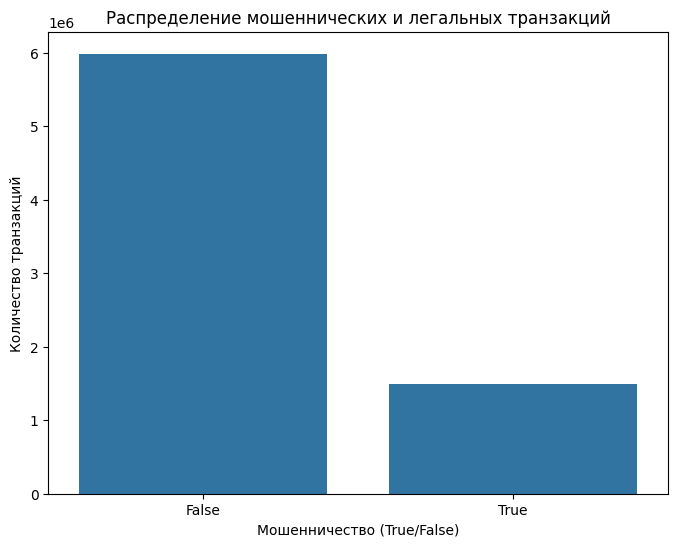

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=transactions)
plt.title('Распределение мошеннических и легальных транзакций')
plt.xlabel('Мошенничество (True/False)')
plt.ylabel('Количество транзакций')
plt.show()

In [ ]:
pd.crosstab(
    index=transactions['vendor_category'],
    columns=transactions['vendor_type'],
    values=transactions['is_fraud'],
    aggfunc='mean'
)

vendor_type,airlines,booking,casual,events,fast_food,gaming,hotels,local,major,medical,online,pharmacy,physical,premium,streaming,supplies,transport
vendor_category,,,,,,,,,,,,,,,,,
Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199159,NaN,NaN,NaN,NaN,0.199758,NaN
Entertainment,NaN,NaN,NaN,0.200017,NaN,0.199558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19932,NaN,NaN
Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199642,0.199821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199893,NaN,0.200496,NaN,NaN,NaN,NaN
Healthcare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198978,NaN,0.199773,NaN,NaN,NaN,NaN,NaN
Restaurant,NaN,NaN,0.199186,NaN,0.200719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199179,NaN,NaN,NaN
Retail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198879,NaN,0.199916,NaN,NaN,NaN,NaN
Travel,0.200535,0.200174,NaN,NaN,NaN,NaN,0.199487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201169


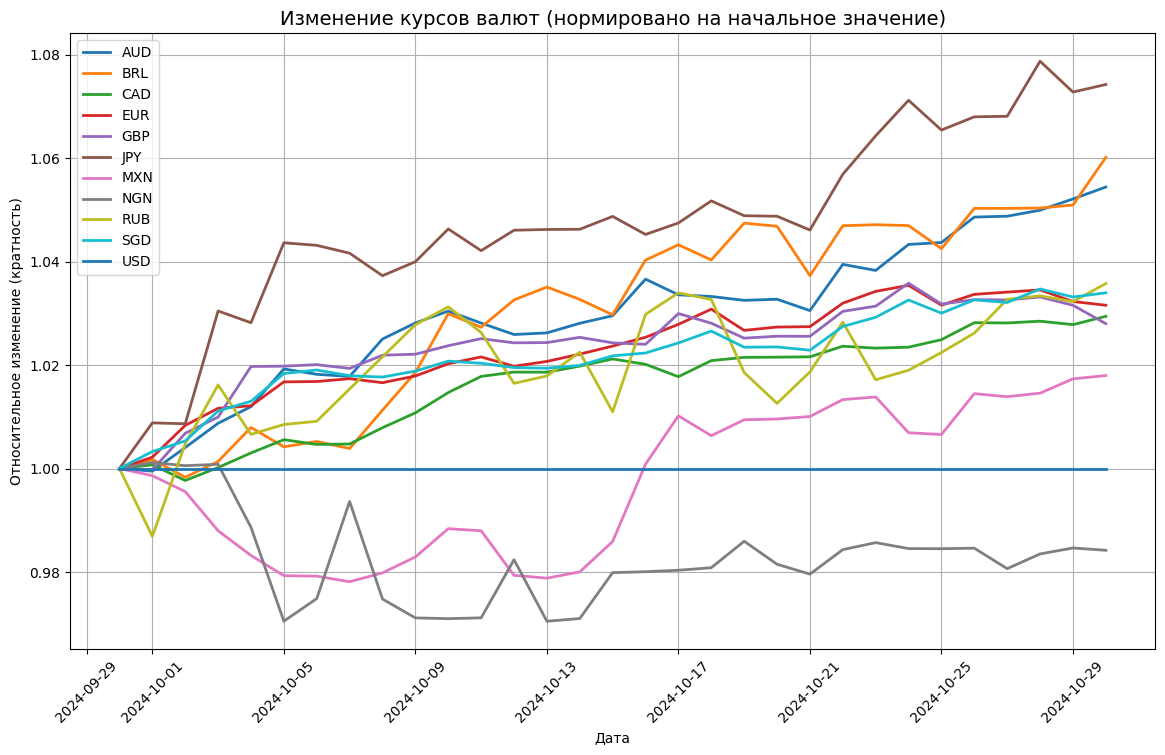

In [ ]:
exchange_norm = exchange_rates.set_index('date').apply(lambda x: x / x.iloc[0]).reset_index()

plt.figure(figsize=(14, 8))
for currency in exchange_norm.columns.drop('date'):
    plt.plot(exchange_norm['date'], exchange_norm[currency], label=currency, linewidth=2)

plt.title('Изменение курсов валют (нормировано на начальное значение)', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение (кратность)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

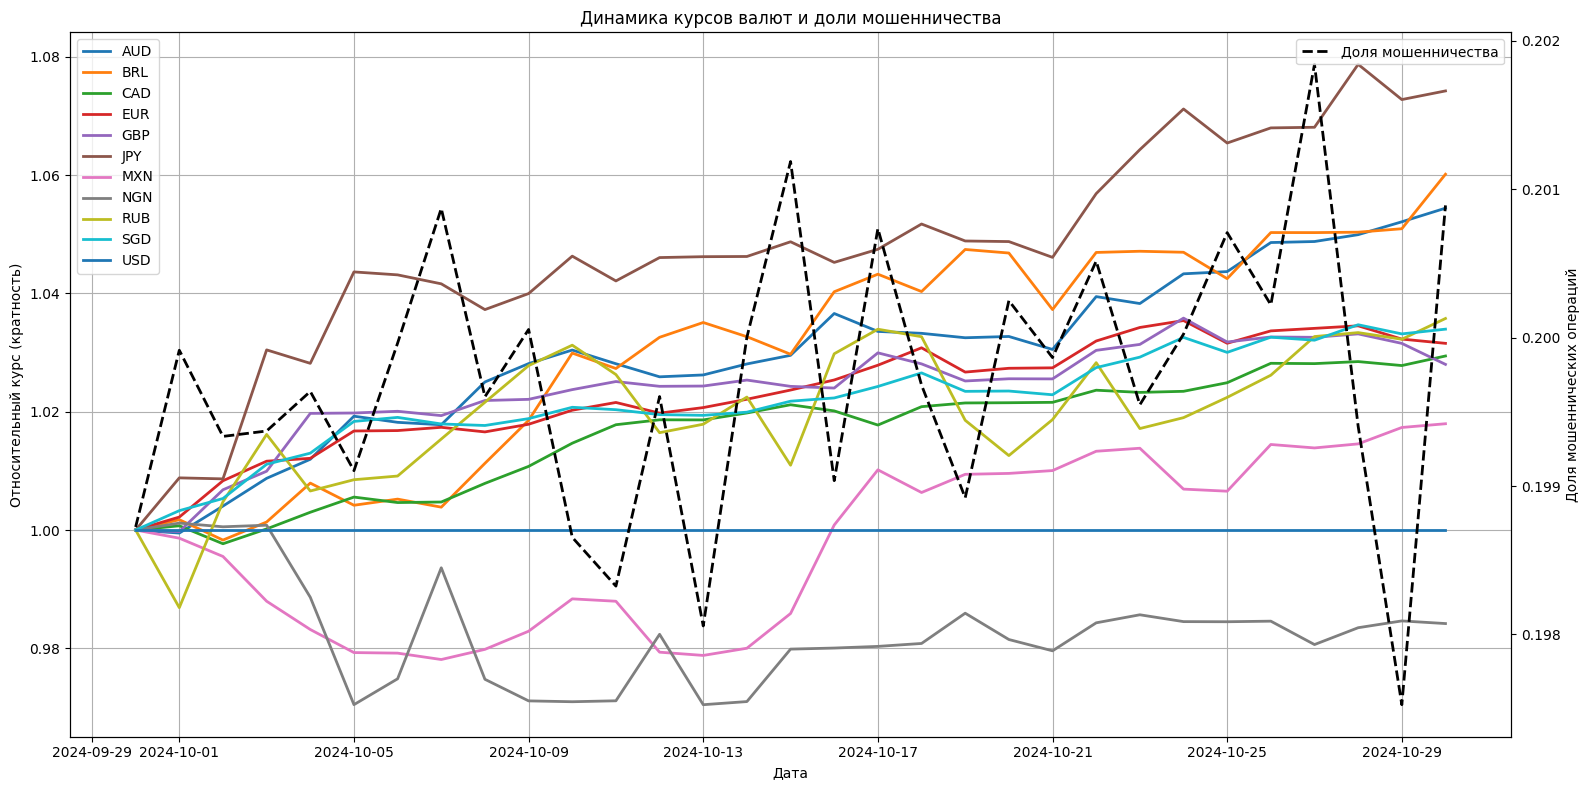

In [ ]:
exchange_norm = exchange_rates.set_index('date').apply(lambda x: x / x.iloc[0]).reset_index()

transactions['date'] = pd.to_datetime(transactions['timestamp'].dt.date)  # Убедимся, что тип datetime64[ns]
fraud_by_date = transactions.groupby('date')['is_fraud'].mean().reset_index()

combined_data = pd.merge(
    exchange_norm,
    fraud_by_date,
    on='date',
    how='left'
)

plt.figure(figsize=(16, 8))
ax1 = plt.gca()
for currency in exchange_norm.columns.drop('date'):
    ax1.plot(combined_data['date'], combined_data[currency], label=currency, linewidth=2)

ax1.set_xlabel('Дата')
ax1.set_ylabel('Относительный курс (кратность)')
ax1.set_title('Динамика курсов валют и доли мошенничества')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(combined_data['date'], combined_data['is_fraud'],
        label='Доля мошенничества', color='black', linestyle='--', linewidth=2)
ax2.set_ylabel('Доля мошеннических операций')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

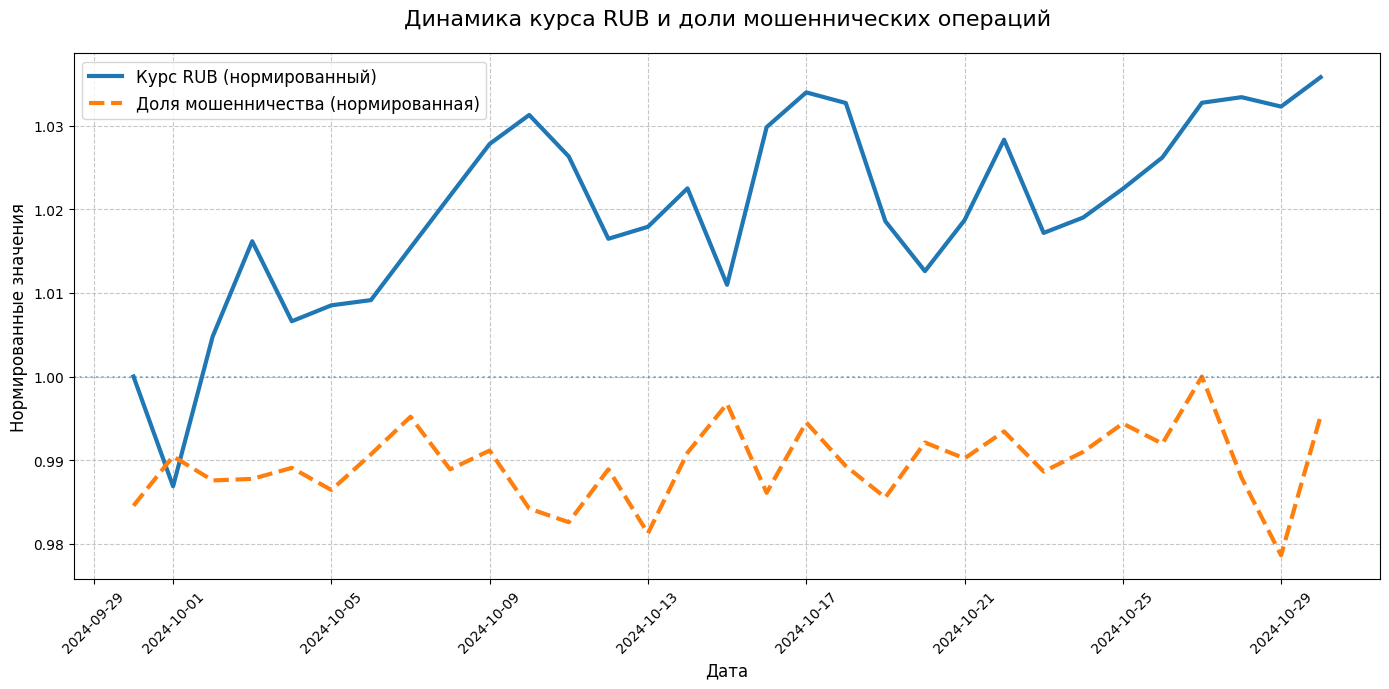

In [ ]:
exchange_norm = exchange_rates.set_index('date')['RUB'] / exchange_rates['RUB'].iloc[0]
exchange_norm = exchange_norm.reset_index(name='RUB_norm')

# Расчет доли мошенничества по дням (нормированной на максимальное значение)
transactions['date'] = pd.to_datetime(transactions['timestamp'].dt.date)
fraud_by_date = transactions.groupby('date')['is_fraud'].mean().reset_index()
fraud_by_date['fraud_norm'] = fraud_by_date['is_fraud'] / fraud_by_date['is_fraud'].max()  # Нормировка на максимум

# Объединение данных
combined_data = pd.merge(exchange_norm, fraud_by_date, on='date', how='left')

plt.figure(figsize=(14, 7))

# График курса RUB (нормированный)
plt.plot(combined_data['date'], combined_data['RUB_norm'],
         label='Курс RUB (нормированный)', color='#1f77b4', linewidth=3)

# График доли мошенничества (нормированной)
plt.plot(combined_data['date'], combined_data['fraud_norm'],
         label='Доля мошенничества (нормированная)', color='#ff7f0e', linestyle='--', linewidth=3)

# Настройки графика
plt.title('Динамика курса RUB и доли мошеннических операций', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Нормированные значения', fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Добавим горизонтальную линию на уровне 1.0 для RUB
plt.axhline(y=1.0, color='#1f77b4', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
correlation = combined_data['RUB_norm'].corr(combined_data['fraud_norm'])
print(f"Корреляция между курсом RUB и мошенничеством: {correlation:.2f}")

Корреляция между курсом RUB и мошенничеством: 0.08


Совпадение пиков и низин
Гипотеза: Мошенники активизируются на фоне ослабления рубля

Но корреляция низкая так что гипотеза не актуальна

# Исследование взаимосвязи мошенничества с операциями за границей

Гипотеза: Операции за границей подозрительные

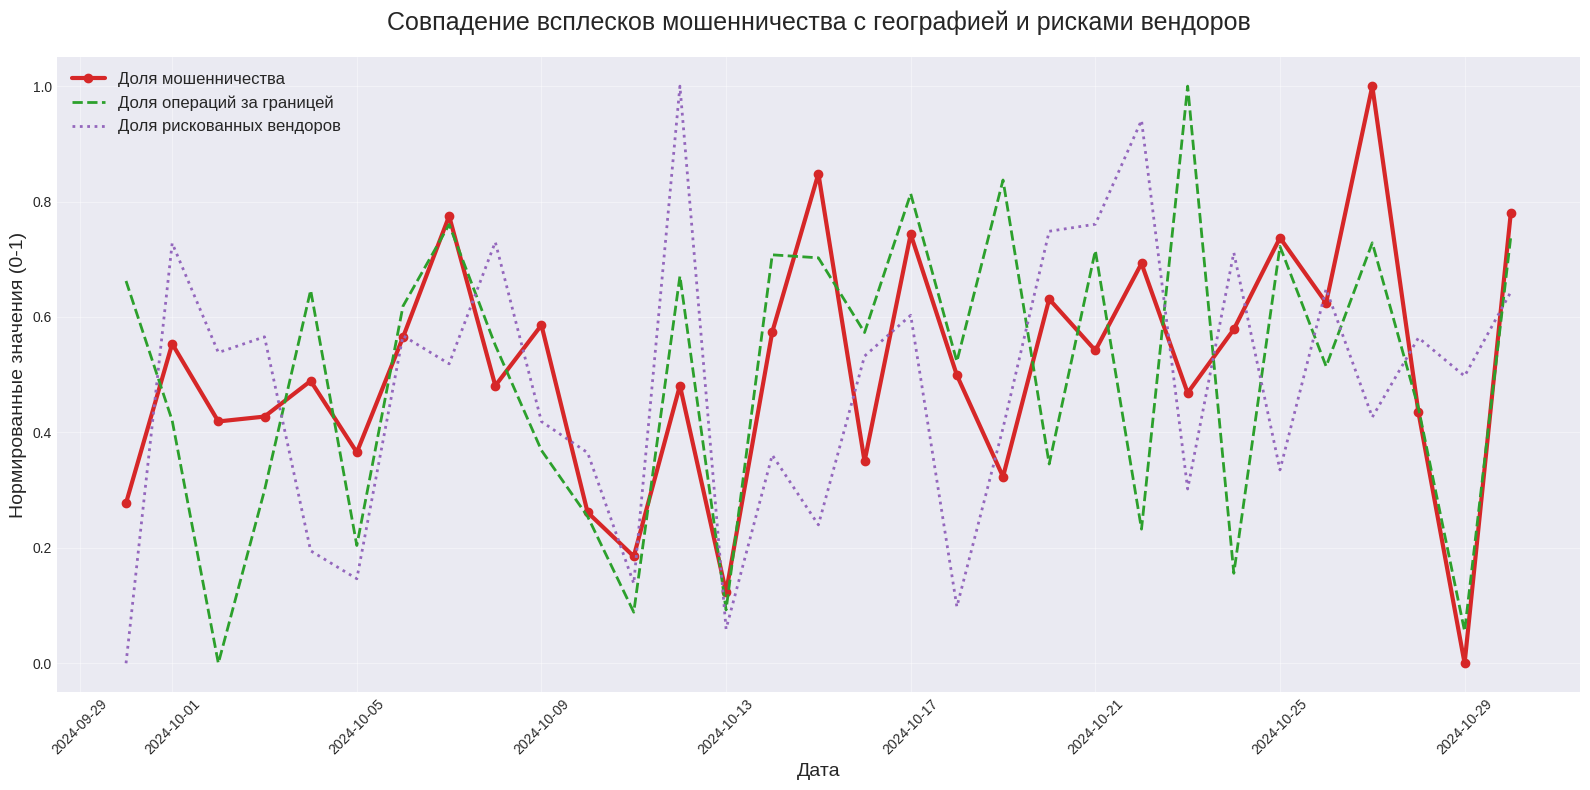

In [ ]:
daily_data = transactions.groupby('date').agg({
    'is_fraud': 'mean',               # Доля мошенничества
    'is_outside_home_country': 'mean', # Доля операций за границей
    'is_high_risk_vendor': 'mean',     # Доля рискованных вендоров
    'amount': 'count'                 # Общее число операций (для контекста)
}).reset_index()

# Нормировка всех столбцов
cols_to_normalize = ['is_fraud', 'is_outside_home_country', 'is_high_risk_vendor']
for col in cols_to_normalize:
    min_val = daily_data[col].min()
    max_val = daily_data[col].max()
    daily_data[f'{col}_norm'] = (daily_data[col] - min_val) / (max_val - min_val)

plt.figure(figsize=(16, 8))

# Настройка стиля
plt.style.use('seaborn-v0_8-darkgrid')

# Графики нормированных данных
plt.plot(daily_data['date'], daily_data['is_fraud_norm'],
         label='Доля мошенничества', color='#d62728', linewidth=3, marker='o')

plt.plot(daily_data['date'], daily_data['is_outside_home_country_norm'],
         label='Доля операций за границей', color='#2ca02c', linewidth=2, linestyle='--')

plt.plot(daily_data['date'], daily_data['is_high_risk_vendor_norm'],
         label='Доля рискованных вендоров', color='#9467bd', linewidth=2, linestyle=':')

# Настройка осей и легенды
plt.title('Совпадение всплесков мошенничества с географией и рисками вендоров', fontsize=18, pad=20)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Нормированные значения (0-1)', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

In [ ]:
corr = daily_data[['is_fraud_norm', 'is_outside_home_country_norm', 'is_high_risk_vendor_norm']].corr()
corr

,is_fraud_norm,is_outside_home_country_norm,is_high_risk_vendor_norm
is_fraud_norm,1.000000,0.520715,0.327510
is_outside_home_country_norm,0.520715,1.000000,0.014968
is_high_risk_vendor_norm,0.327510,0.014968,1.000000


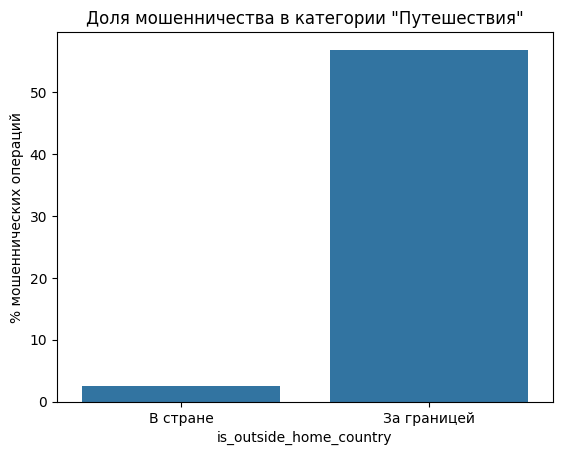

In [ ]:
travel_fraud = transactions[transactions['vendor_category'] == 'Travel']
geo_fraud = travel_fraud.groupby('is_outside_home_country')['is_fraud'].mean() * 100
sns.barplot(
    x=geo_fraud.index.map({False: 'В стране', True: 'За границей'}),
    y=geo_fraud.values
)
plt.title('Доля мошенничества в категории "Путешествия"')
plt.ylabel('% мошеннических операций')
plt.show()

In [ ]:
travel_fraud_devices = (
    transactions[transactions['vendor_category'] == 'Travel']
    .groupby(['is_fraud', 'device'])
    .size()
    .unstack()
    .fillna(0)
)

# Топ устройств для мошеннических операций:
fraud_devices = travel_fraud_devices.loc[True].nlargest(5)
fraud_devices

,True
device,
Magnetic Stripe,27379.0
NFC Payment,27210.0
Chip Reader,27180.0
Firefox,18049.0
Android App,17844.0


In [ ]:
import pandas as pd

# Создаем DataFrame из статистик
fraud_stats = travel_fraud[travel_fraud['is_fraud']]['amount'].describe().to_frame('Мошеннические')
legit_stats = travel_fraud[~travel_fraud['is_fraud']]['amount'].describe().to_frame('Легальные')

# Объединяем и форматируем
stats_combined = pd.concat([fraud_stats, legit_stats], axis=1)

# Форматируем числа (убираем научную нотацию и добавляем разделители тысяч)
pd.options.display.float_format = '{:,.2f}'.format
stats_combined = stats_combined.applymap(lambda x: f"{x:,.2f}" if pd.notnull(x) else "")

# Переводим индексы на русский
stats_combined.index = [
    'Количество операций',
    'Среднее',
    'Станд. отклонение',
    'Минимум',
    '25% персентиль',
    'Медиана (50%)',
    '75% персентиль',
    'Максимум'
]


stats_combined

/tmp/ipython-input-2380252719.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stats_combined = stats_combined.applymap(lambda x: f"{x:,.2f}" if pd.notnull(x) else "")


,Мошеннические,Легальные
Количество операций,"187,477.00","748,313.00"
Среднее,"281,546.83","51,107.04"
Станд. отклонение,"761,352.29","142,983.74"
Минимум,0.01,18.94
25% персентиль,300.81,602.36
Медиана (50%),"9,809.29","1,680.40"
75% персентиль,"135,084.54","21,679.83"
Максимум,"6,253,152.62","1,240,629.47"


- Большая часть мошеннических операций в категории "Путешествия", происходящие заграницей - мошеннические
- Чаще всего мошеннические операции заграницей проводятся с использованием Magnetic Stripe, NFC, Chip Reader
- Мошеннические операции сильно дороже


# Взаимосвязь активности и мошеннических операций


In [ ]:
# Разворачиваем структуру last_hour_activity
activity_features = pd.json_normalize(travel_fraud['last_hour_activity']).add_prefix('last_hour_')
travel_fraud = pd.concat([travel_fraud, activity_features], axis=1)

In [ ]:
# Группируем по флагу мошенничества и считаем средние значения
activity_comparison = travel_fraud.groupby('is_fraud')[[
    'last_hour_num_transactions',
    'last_hour_total_amount',
    'last_hour_unique_merchants',
    'last_hour_unique_countries',
    'last_hour_max_single_amount'
]].mean().T

# Форматируем вывод
activity_comparison.columns = ['Легальные', 'Мошеннические']
activity_comparison['Разница (раз)'] = activity_comparison['Мошеннические'] / activity_comparison['Легальные']
activity_comparison.style.format('{:.2f}').background_gradient(cmap='Reds')

,Легальные,Мошеннические,Разница (раз)
last_hour_num_transactions,401.22,435.47,1.09
last_hour_total_amount,19560245.67,21479005.66,1.10
last_hour_unique_merchants,79.38,82.70,1.04
last_hour_unique_countries,10.61,10.89,1.03
last_hour_max_single_amount,1721290.55,1809016.94,1.05


#Другое

/tmp/ipython-input-1653964780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_size_fraud.index, y=city_size_fraud.values, palette='rocket')


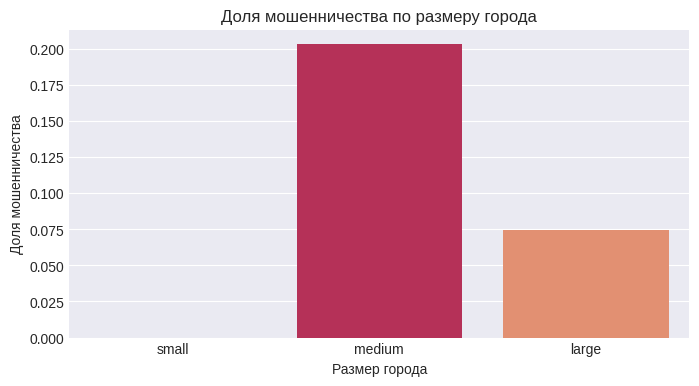

In [ ]:
city_size_fraud = transactions.groupby('city_size')['is_fraud'].mean().reindex(
    ['small', 'medium', 'large']  # Упорядочиваем категории
)

plt.figure(figsize=(8, 4))
sns.barplot(x=city_size_fraud.index, y=city_size_fraud.values, palette='rocket')
plt.title('Доля мошенничества по размеру города')
plt.ylabel('Доля мошенничества')
plt.xlabel('Размер города')
plt.show()

/tmp/ipython-input-2689701507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_fraud.values, y=device_fraud.index, palette='mako')


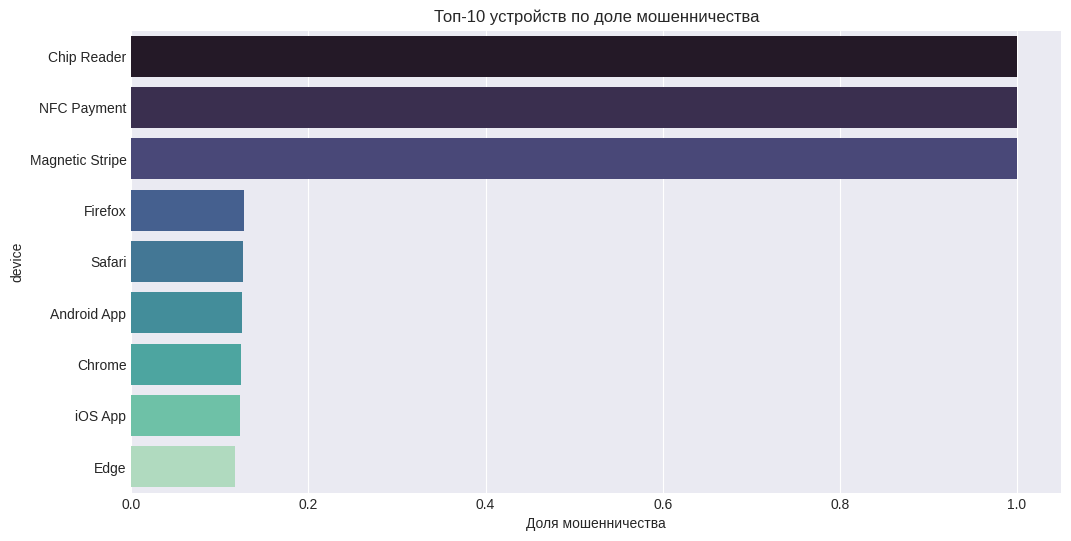

In [ ]:
# Топ-10 устройств по частоте мошенничества
device_fraud = transactions.groupby('device')['is_fraud'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=device_fraud.values, y=device_fraud.index, palette='mako')
plt.title('Топ-10 устройств по доле мошенничества')
plt.xlabel('Доля мошенничества')
plt.show()

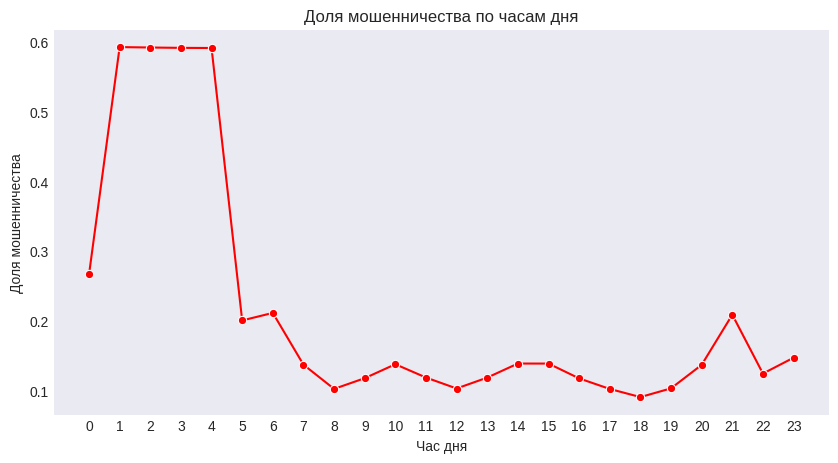

In [ ]:
# Извлечение часа из времени
transactions['hour'] = transactions['timestamp'].dt.hour
hourly_fraud = transactions.groupby('hour')['is_fraud'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_fraud.index, y=hourly_fraud.values, marker='o', color='red')
plt.xticks(range(0, 24))
plt.title('Доля мошенничества по часам дня')
plt.xlabel('Час дня')
plt.ylabel('Доля мошенничества')
plt.grid()
plt.show()

In [ ]:
round_amounts = transactions[transactions['amount'] % 100 == 0]
print(f"Доля мошенничества среди круглых сумм: {round_amounts['is_fraud'].mean():.2%}")

Доля мошенничества среди круглых сумм: 19.21%


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

features = ['amount', 'is_outside_home_country', 'is_high_risk_vendor',
            'is_weekend', 'is_card_present', 'city_size', 'card_type',
            'vendor_category', 'is_fraud']

# Преобразуем категориальные признаки
cat_features = ['city_size', 'card_type', 'vendor_category']
data_encoded = pd.get_dummies(transactions[features], columns=cat_features)

# Масштабируем числовые признаки
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded.drop('is_fraud', axis=1))

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


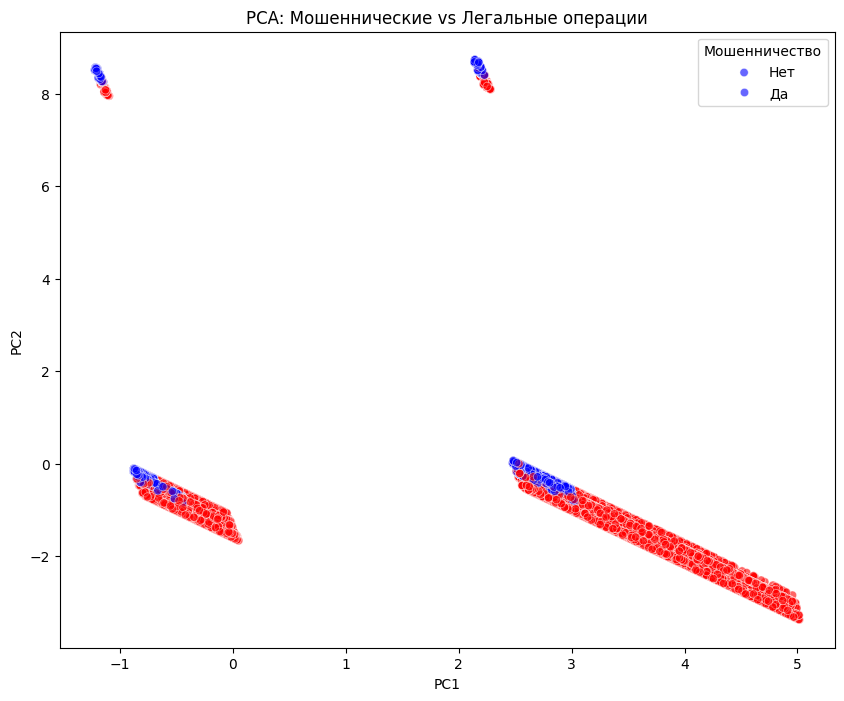

In [ ]:
# Применяем PCA для сокращения до 2 компонент
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Создаем DataFrame для визуализации
pca_df = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
pca_df['is_fraud'] = transactions['is_fraud'].values

# Визуализация
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='is_fraud', data=pca_df,
               palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('PCA: Мошеннические vs Легальные операции')
plt.legend(title='Мошенничество', labels=['Нет', 'Да'])
plt.show()

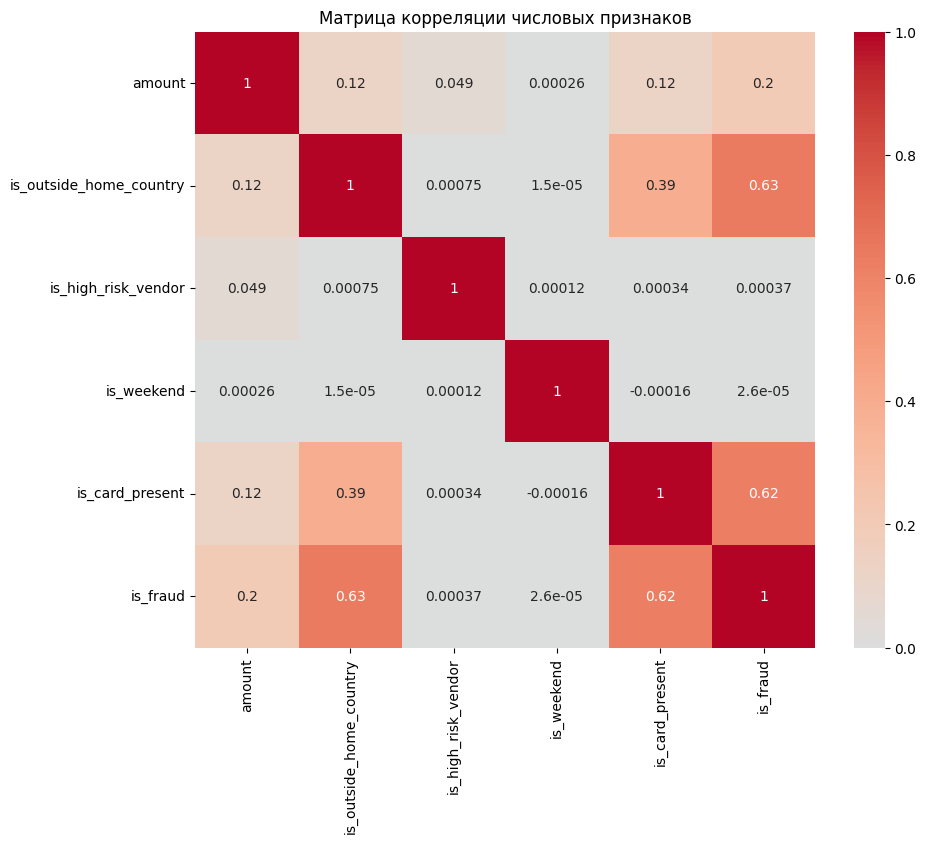

In [ ]:
# Выбираем только числовые признаки
numeric_features = ['amount', 'is_outside_home_country',
                   'is_high_risk_vendor', 'is_weekend',
                   'is_card_present', 'is_fraud']

plt.figure(figsize=(10, 8))
sns.heatmap(transactions[numeric_features].corr(), annot=True,
           cmap='coolwarm', center=0)
plt.title('Матрица корреляции числовых признаков')
plt.show()

In [ ]:
# Выбираем 4 наиболее важных признака
key_features = ['amount', 'is_outside_home_country',
               'is_high_risk_vendor', 'is_fraud']

sns.pairplot(transactions[key_features], hue='is_fraud',
            palette={0: 'blue', 1: 'red'}, corner=True)
plt.suptitle('Pairplot ключевых признаков', y=1.02)
plt.show()

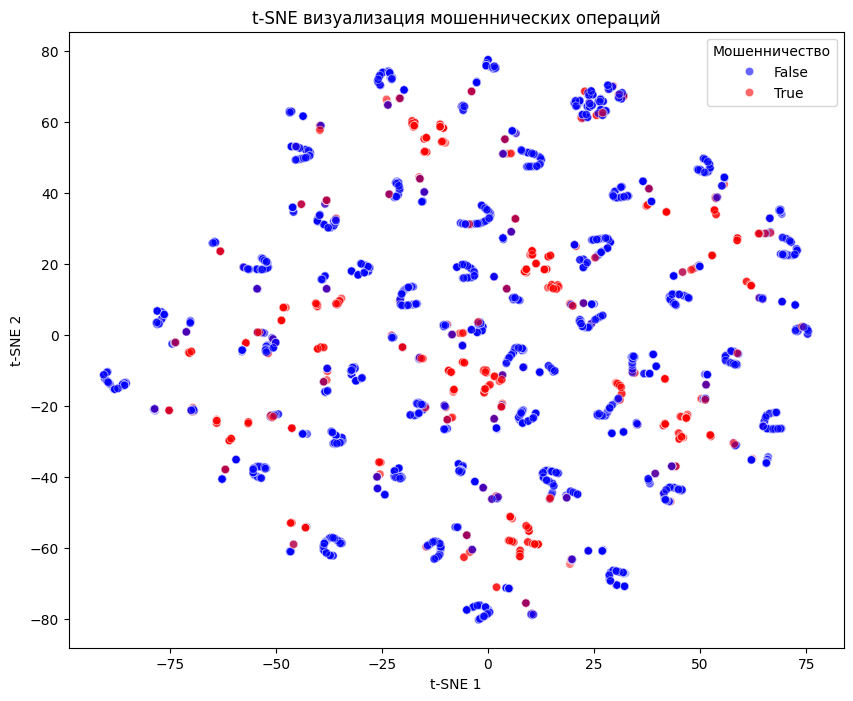

In [ ]:
from sklearn.manifold import TSNE

# Используем подвыборку для скорости
sample_data = transactions.sample(n=5000, random_state=42)

# Подготовка данных
sample_encoded = pd.get_dummies(sample_data[features], columns=cat_features)
sample_scaled = scaler.fit_transform(sample_encoded.drop('is_fraud', axis=1))

# Применяем t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(sample_scaled)

# Визуализация
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1],
               hue=sample_data['is_fraud'],
               palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('t-SNE визуализация мошеннических операций')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Мошенничество')
plt.show()

In [ ]:
# Фильтрация мошеннических операций
fraud_data = transactions[transactions['is_fraud']].copy()

# Выбор ключевых признаков
features = ['amount', 'is_outside_home_country', 'is_high_risk_vendor',
            'vendor_category', 'card_type', 'device', 'channel']

# Преобразование категориальных признаков
fraud_encoded = pd.get_dummies(fraud_data[features], drop_first=True)

# Масштабирование
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fraud_encoded)